# LO vs. NLO simulation 

In this exercise we, will get familiar with leading order (LO) and next-to-leading order (NLO) simulated events. As you might know, beyond the "tree-level", things can get messy. The NLO Feynman diagrams (diagrams with one loop) need to be taken into account and, for instance, the cross section calculation becomes harder. The NLO diagrams influence the experimental results as well. 

Your task this week is to analyse two datasets. One is a ttbar process (a process that produces a top quark and an anti-top quark) simulated in LO and the other is a ttbar process in NLO. These simulations have been made in the framework of CMS detector by following the circumstances of 2016 data taking. This means that we are looking at proton-proton collisions with $\sqrt{s}$ = 13 TeV center-of-mass energy. 

In this exercise, we are studying jets. Jets are collimated sprays of hadrons, which originate from quarks or gluons. The lifetime of a top quark is very short, and approximately 99.8% of time it decays into a bottom quark and a W boson. The bottom quark forms a jet, which is then measured. (Note: the W boson can also form jets if it decays into quarks rather than leptons.) The difference between LO and NLO can be seen, for instance, in the jet distributions.

The data for transverse momenta and pseudorapidities is structured so that each line contains the data for all jets in the same event. We want to read the data so that it's a list of lists where each inner list contains all jets in the same event. An example of doing that can be seen below.

In [1]:
import pandas as pd

# An example of how to read the pt values into a nested Python list
pts_LO = []

with open('tt_LO_pt1.txt', 'r') as f:
    for line in f.readlines():
        event = line.rstrip('\n').split(',')
        event = [float(i) for i in event]
        pts_LO.append(event)

print('The pT of the first jet in the first event is', round(pts_LO[0][0], 2), 'GeV')

The pT of the first jet in the first event is 79.74 GeV


## Part 1 - LO and NLO jet counts

The first task is to plot the numbers of jets per event in a histogram and compare the obtained distributions for LO and NLO. Use the tt_LO_pt1.txt, tt_LO_eta1.txt, tt_NLO_pt1.txt, tt_NLO_eta1.txt, tt_NLO_weights1.csv files for this exercise. 

**NOTE**: The simulated NLO events need to be weighted. Each event has a weight assigned to it which can be found in file tt_NLO_weights1.csv. Read these and use the resulting array as input for the 'weights' argument in plt.hist. Some weights are negative. The negative weights are an artifact of the cross section calculation. There some terms get a negative weight from a fermion loop. Also normalize the histograms since there are different amounts of LO and NLO events. Hint: the normalization can be done by giving plt.hist the option 'density=True'.

Calculate the average number of jets per event for both datasets. Note that the weighting in NLO needs to also be included in the calculation of the average. You can do that for example by using histogram bin heights. Does including NLO Feynman diagrams actually make a difference in practice?



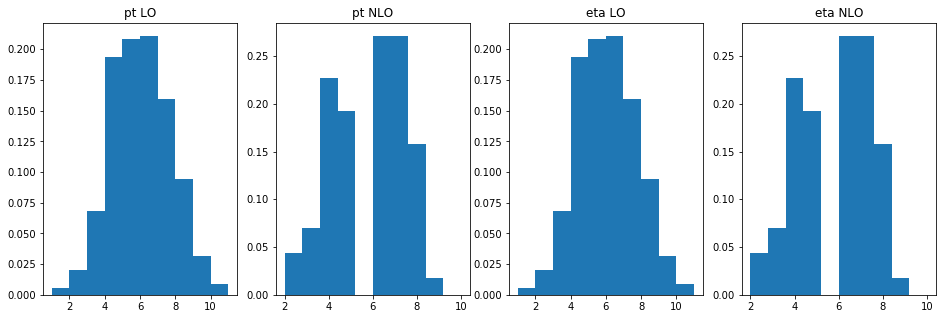

Average number of jets per event (pT LO): 5.58
Average number of jets per event (pT NLO): 5.69
Average number of jets per event (eta LO): 5.58
Average number of jets per event (eta NLO): 5.69


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# function returns a list of lists, each line contains all the jets in an event
def read_txt_file(data_file):
    with open(data_file, 'r') as f:
        output_list = []
        for line in f.readlines():
            event = line.rstrip('\n').split(',')
            event = [float(i) for i in event]
            output_list.append(event)
    return output_list

pts_LO = read_txt_file('tt_LO_pt1.txt')
etas_LO = read_txt_file('tt_LO_eta1.txt')
pts_NLO = read_txt_file('tt_NLO_pt1.txt')
etas_NLO = read_txt_file('tt_NLO_eta1.txt')
weights = pd.read_csv('tt_NLO_weights1.csv')
weights_array = weights.iloc[:, 0].to_numpy()  # making a 1D array instead of the series 


def count_jets(events):
    return [len(event) for event in events]  # Count the jets in each event

# Count the number of jets for both LO and NLO 
number_of_jets_ptLO = count_jets(pts_LO)
number_of_jets_ptNLO = count_jets(pts_NLO)
number_of_jets_etLO = count_jets(etas_LO)  
number_of_jets_etNLO = count_jets(etas_NLO)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (16,5))  

ax1.hist(number_of_jets_ptLO, density = True )
ax2.hist(number_of_jets_ptNLO, weights = weights_array, density = True )

ax1.set_title('pt LO')
ax2.set_title('pt NLO')

ax3.hist(number_of_jets_etLO, density = True )
ax4.hist(number_of_jets_etNLO, weights = weights_array, density = True )

ax3.set_title('eta LO')
ax4.set_title('eta NLO')

plt.show()


#Calculating the average number of jets per event
# Average for LO (unweighted)
avg_jets_ptLO = np.mean(number_of_jets_ptLO)
avg_jets_etLO = np.mean(number_of_jets_etLO)


# Average for NLO (weighted)
def weighted_average(jets, weights):
    return np.average(jets, weights = weights)

avg_jets_ptNLO = weighted_average(number_of_jets_ptNLO, weights_array)
avg_jets_etNLO = weighted_average(number_of_jets_etNLO, weights_array)

# Print averages
print(f'Average number of jets per event (pT LO): {avg_jets_ptLO:.2f}')
print(f'Average number of jets per event (pT NLO): {avg_jets_ptNLO:.2f}')
print(f'Average number of jets per event (eta LO): {avg_jets_etLO:.2f}')
print(f'Average number of jets per event (eta NLO): {avg_jets_etNLO:.2f}')

The histograms do not differ very much from each other. It seems that events with 5 jets do not occure for NLO processes. The average however is very similar and analyzing LO processes is sufficient to a certain precision. 

## Part 2 - Plotting pT

In this part we will take a look at the transverse momenta of individual jets in the LO dataset after doing some cuts. Accept only the jets that have $50 \textrm{ GeV} < p_T < 150 \textrm{ GeV}$ and $|\eta| < 2.1$. Use the same LO files you used in part 1.

Plot the transverse momentum for the accepted jets in a histogram. Normalize the pT distribution. Use 40 bins for the histogram. 



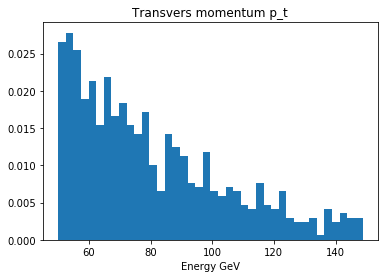

In [3]:
# Plot the jet pT for LO after cuts
masked_pts_LO = []

# Loop through each event in pts_LO and etas_LO simultaneously
for event_pts, event_etas in zip(pts_LO, etas_LO):
    for pt, eta in zip(event_pts, event_etas):
        # Check the conditions for both pt and eta
        if 50 < pt < 150 and eta < 2.1:
            masked_pts_LO.append(pt)
            
hist, bins, patches = plt.hist(masked_pts_LO, bins = 40, density = True)
plt.title('Transvers momentum p_t')
plt.xlabel('Energy GeV');


## Part 3 - Fitting an exponential

The data you plotted should look like it could be reasonably modelled by an exponentially decaying function. Let's train curve fitting once more and try to fit an exponential curve $c_1e^{c_2x}$ to the data ($c_1$ and $c_2$ are constants).

We have used scipy.curve_fit before, but here we can be smarter than that. The easiest way to do this is to realize that an exponential curve is just a straight line after taking a logarithm. Therefore you can take the natural
logarithms of bin heights and fit a straight line $ax+b$ to them using [numpy.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) (fitting polynomials is in general quite easy and much less frustrating than arbitrary functions). The exponential curve is then $e^be^{ax}$.

Write a function **exponential_fit(heights, bin_edges)** which takes the first two return values given by plt.hist as input parameters. The function should calculate the bin centers and then fit a line to np.log(heights) using np.polyfit. **Return the values $a$ and $e^b$ (NOT just b) in this order**. Note that the function should return two separate values, not a list. You can return multiple values by separating them with a comma.




In [4]:
# Write the function exponential_fit

def exponential_fit(heights, bin_edges):
        centers = [0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_edges)-1) ]
        param = np.polyfit(centers, np.log(heights), deg=1)
        return param[0], np.exp(param[1])

a , b = exponential_fit(hist, bins)
print(f'Parameter a = {a:.3f}')
print(f'Exponent e^b = {b:.3f}')

Parameter a = -0.027
Exponent e^b = 0.109


Confirm with a plot that the curve created by your function fits reasonably well to the data. What are the parameters $a$ and $e^b$ for your data?



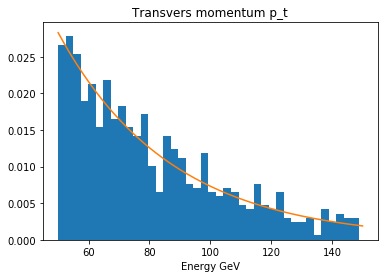

In [5]:
# Fit an exponential curve to the data.
hist, bins, patches = plt.hist(masked_pts_LO, bins = 40, density = True)
plt.title('Transvers momentum p_t')
plt.xlabel('Energy GeV')

def f(x):
    return b * np.exp(a*x)

x = np.linspace(50, 150 , 150)
y = f(x)
plt.plot(x,y);